In [103]:
#进行数学运算
import math
import numpy as np
#进行随机选择
import random
import matplotlib.pyplot as plt

In [104]:
point=[]
layout = []
filename = "./us_cities_1158_afterprocess.xyn.txt"

In [105]:
def prepare_data(select):
    point.clear()
    layout.clear()
    num = 1
    for line in open(filename):
        index, x, y = line.strip().split(" ")
        if int(index) % select == 0:
            point.extend([(num,(float(x),float(y)))])
            num = num + 1



    for i in range(len(point)):
        layout.append([i+1, random.randint(1,4), 0])
    # print(layout[:5])
    # print(point[:5])

In [106]:
prepare_data(4)

In [107]:
gapx, gapy = 5, 0.2
def getPos(i,m):
    pointx = point[i][1][0]
    pointy = point[i][1][1]
    # print(pointx, pointy)
    if m==1:
        return [(pointx,pointy),(pointx+gapx,pointy),(pointx+gapx,pointy+gapy),(pointx,pointy+gapy)]
    elif m==2:
        return [(pointx-gapx,pointy),(pointx,pointy),(pointx,pointy+gapy),(pointx-gapx,pointy+gapy)]
    elif m==3:
        return [(pointx-gapx,pointy-gapy),(pointx,pointy-gapy),(pointx,pointy),(pointx-gapx,pointy)]
    else:
        return [(pointx, pointy-gapy),(pointx+gapx,pointy-gapy),(pointx+gapx,pointy),(pointx,pointy)]
    
print(getPos(1,2))

[(100.87, 37.45), (105.87, 37.45), (105.87, 37.650000000000006), (100.87, 37.650000000000006)]


In [108]:
def inner(point, rec):
    if point[0] > rec[0][0] and point[1] > rec[0][1] and point[0] < rec[1][0] and point[1] > rec[1][1] and point[0] < rec[2][0] and point[1] < rec[2][1] and point[0] > rec[3][0] and point[1] < rec[3][1]:
        return True
    return False

In [109]:
def conflict(vect,i,j):
    """
    判断冲突
    """
    m = vect[i][1]
    n = vect[j][1]
    reci = getPos(i,m)
    recj = getPos(j,n)
    for i in range(len(reci)):
        if inner(reci[i], recj):
            return True
    return False


In [110]:
def cost_function(vect, x=3, y=0.1):
    """
    计算每个点冲突
    """
    sum = 0
    res = 0
    for i in range(len(point)):
        temp = 0
        res = res + vect[i][1]*y
        for j in range(len(point)):
            if i != j:
                if(conflict(vect,i,j)):
                    temp = temp + 1
        vect[i][2] = temp
        sum = sum + temp
    # print("conflict:"+str(sum))
    sum = x*sum+res
    return sum
cost_function(layout, 1, 0)
# print(costroad(layout))

276

In [111]:
def cost_dif(new_set, old_set, pointx):
    conflict_sum = 0
    for i in range(len(point)):
        a = conflict(new_set, i, pointx-1)
        b = conflict(old_set, i, pointx-1)
        # print(i,pointx,a,b)
        if a is True and b is False:
            conflict_sum = conflict_sum + 1
        elif a is False and b is True:
            conflict_sum = conflict_sum - 1
    # print(new_set[pointx-1][1], old_set[pointx-1][1])
    conflict_sum = conflict_sum * 3 - new_set[pointx-1][1]*0.1 + old_set[pointx-1][1]*0.1
    return conflict_sum
            

In [112]:
import copy
def generate_new_set(old_set):
    sel = random.sample(old_set,1)
    while True:
        nextPos = random.randint(1,4)
        if nextPos != sel[0][1]:
            break
    m = [sel[0][0],sel[0][1],nextPos]
    new_set = copy.deepcopy(old_set)
    new_set[sel[0][0]-1][1] = m[2]
    diff = cost_dif(new_set, old_set, m[0])
    # print(old_set)
    return (new_set,m,diff)
a,b,c = generate_new_set(layout)
print(c)

6.2


In [113]:
import matplotlib.pyplot as plt
def plot(layout,name):
        def create_rect(index, width, height):
                pointx = point[i][1][0]
                pointy = point[i][1][1]
                m = layout[i][1]
                if m==1:
                        x,y = pointx,pointy
                elif m==2:
                        x, y = pointx-width,pointy
                elif m==3:
                        x, y = pointx-width,pointy-height
                else:
                        x, y = pointx, pointy-height
                rect=plt.Rectangle(
                        (x, y),  # (x,y)矩形左下角
                        width,  # width长
                        height,  # height宽
                        # color='maroon', 
                        fill = False)
                return rect
        fig1 = plt.figure(figsize=(8,20))
        # plt.axis('on')
        # plt.axis('scaled')
        ax1 = fig1.add_subplot(111)

        for i in range(len(point)):
                ax1.add_patch(create_rect(i, gapx, gapy))
        plt.xlim(65,180)
        plt.ylim(16,70)
        # 67.78 19.72
        # 176.65 71.3
        plt.savefig("./result/resultImg-{}.svg".format(name), format="svg")
        plt.show()
# plot()
# plt.savefig('scatter.eps',dpi=600,format='eps')

In [114]:
def sasearch(origin_times, init_temperature, min_temperature, cooling_rate, iterates, namefortest):
    # init T
    T = init_temperature
    no_cnt = 0
    layout = []
    result_layout = []
    result_record = []
    for t1 in range(origin_times):
        layout.clear()
        for i in range(len(point)):
            layout.append([i+1, random.randint(1,4), 0])
        print("initial state:")
        # name = "initial"
        cost = cost_function(layout)
        print(cost)
        nameprefix = str(namefortest) + str(cost)
        plot(layout=layout,name=nameprefix)
        while T > min_temperature:
            # old_cost = cost_function(layout)
            # result_record.append(old_cost)
            for i in range(iterates):
                # old_cost = cost_function(layout)
                # result_record.append(old_cost)
                result_layout.append(layout)
                new_set, m, diff = generate_new_set(old_set=layout)
                # print("diff:" + str(diff))
                # diff = new_cost - old_cost
                if diff < 0:
                    # 重新计数
                    no_cnt = 0
                    # 采纳新解
                    layout = new_set[:]
                else:
                    no_cnt = no_cnt + 1
                    # 新解更坏，这时候以一定几率踩纳
                    # np.exp(-(valuenew-valuecurrent)/t)
                    P = np.exp(-(diff)/T)
                    # print("P:"+str(P))
                    # 如果随机数在概率之内，则采纳
                    if random.random() < P:
                        layout = new_set[:]
            # 退火降温
            T = T * cooling_rate
            print(T)
            # 超过5000次没有被采纳，则结束迭代
            if no_cnt > 5000:
                break
    return (result_record, result_layout, layout)

initial state:
898.0999999999999


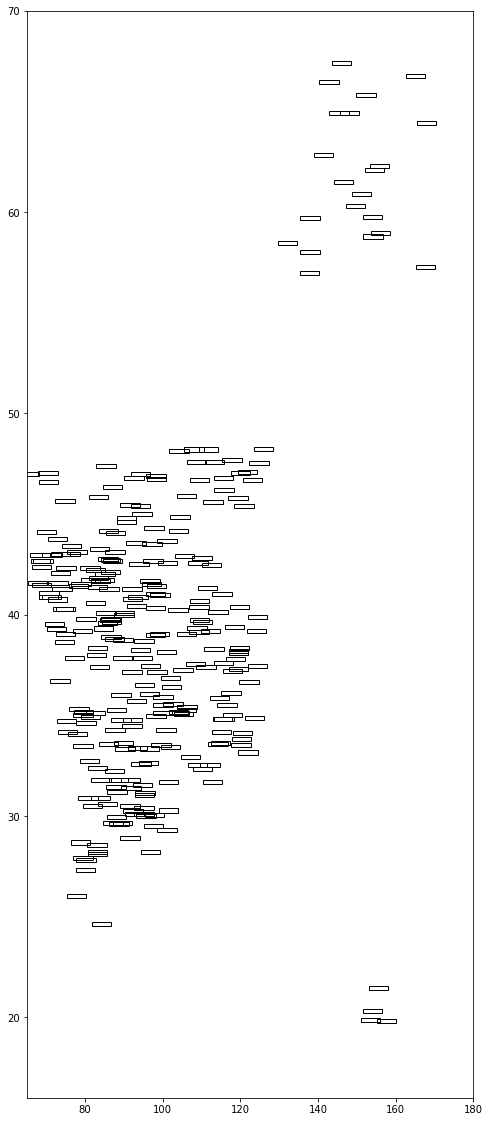

180.0
162.0
145.8
131.22000000000003
118.09800000000003
106.28820000000003
95.65938000000003
86.09344200000002
77.48409780000003
69.73568802000003
62.762119218000024
56.485907296200025
50.83731656658002
45.75358490992202
41.17822641892982
37.06040377703684
33.35436339933316
30.018927059399843
27.01703435345986
24.315330918113872
21.883797826302487
19.695418043672237
17.725876239305013
15.953288615374511
14.35795975383706
12.922163778453355
11.62994740060802
10.466952660547218
9.420257394492497
8.478231655043247
7.630408489538922
6.86736764058503
6.180630876526528
5.562567788873875
5.006311009986487
4.5056799089878385
4.055111918089055
3.6496007262801493
3.2846406536521346
2.956176588286921
2.660558929458229
2.3945030365124063
2.1550527328611655
1.939547459575049
1.7455927136175442
1.57103344225579
1.413930098030211
1.2725370882271898
1.1452833794044708
1.0307550414640236
0.9276795373176213
0.8349115835858592
0.7514204252272733
0.676278382704546
0.6086505444340914
0.5477854899906822
0.4

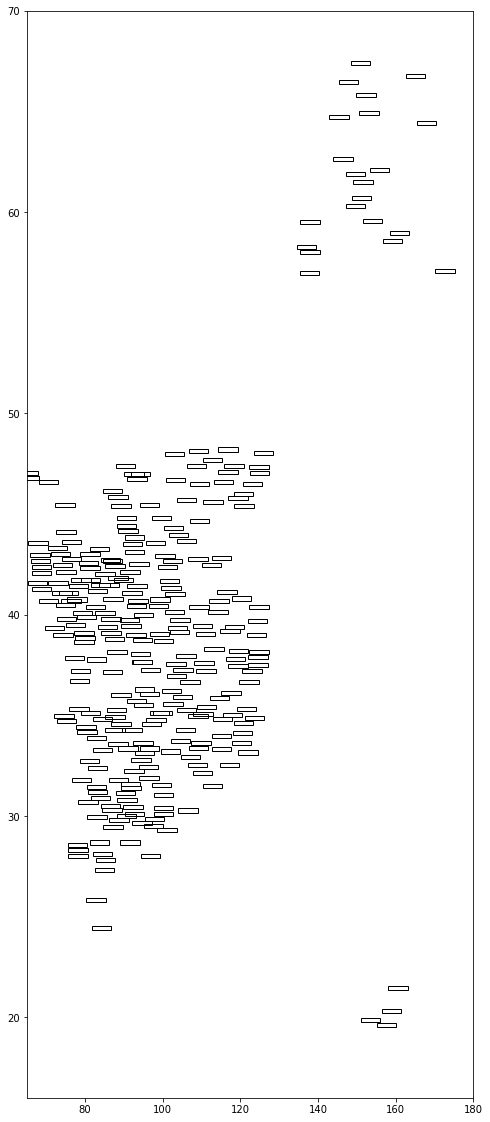

In [115]:
test1_name1 = "200_200_289_random"
test1_name2 = "200_200_289_result"
result_record, result_layout, layout = sasearch(origin_times=1,init_temperature=200, min_temperature=1e-3, cooling_rate=0.90, iterates=200, namefortest=test1_name1)
# plt.plot(result_record)
# plt.show()
cc = cost_function(layout)
print(cc)
nameprefix = str(test1_name2) + str(cc)
plot(layout=layout,name=nameprefix)

initial state:
1689.9


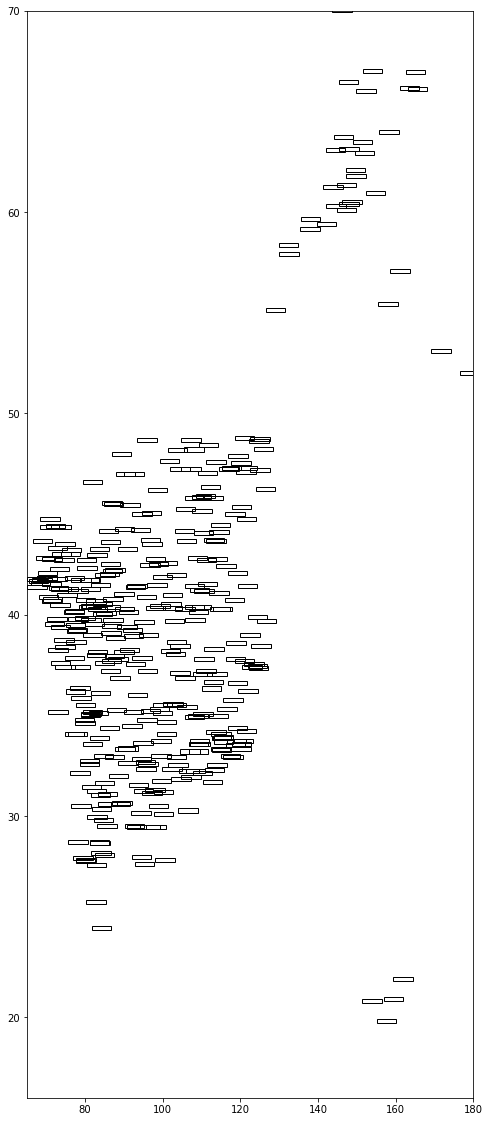

180.0
162.0
145.8
131.22000000000003
118.09800000000003
106.28820000000003
95.65938000000003
86.09344200000002
77.48409780000003
69.73568802000003
62.762119218000024
56.485907296200025
50.83731656658002
45.75358490992202
41.17822641892982
37.06040377703684
33.35436339933316
30.018927059399843
27.01703435345986
24.315330918113872
21.883797826302487
19.695418043672237
17.725876239305013
15.953288615374511
14.35795975383706
12.922163778453355
11.62994740060802
10.466952660547218
9.420257394492497
8.478231655043247
7.630408489538922
6.86736764058503
6.180630876526528
5.562567788873875
5.006311009986487
4.5056799089878385
4.055111918089055
3.6496007262801493
3.2846406536521346
2.956176588286921
2.660558929458229
2.3945030365124063
2.1550527328611655
1.939547459575049
1.7455927136175442
1.57103344225579
1.413930098030211
1.2725370882271898
1.1452833794044708
1.0307550414640236
0.9276795373176213
0.8349115835858592
0.7514204252272733
0.676278382704546
0.6086505444340914
0.5477854899906822
0.4

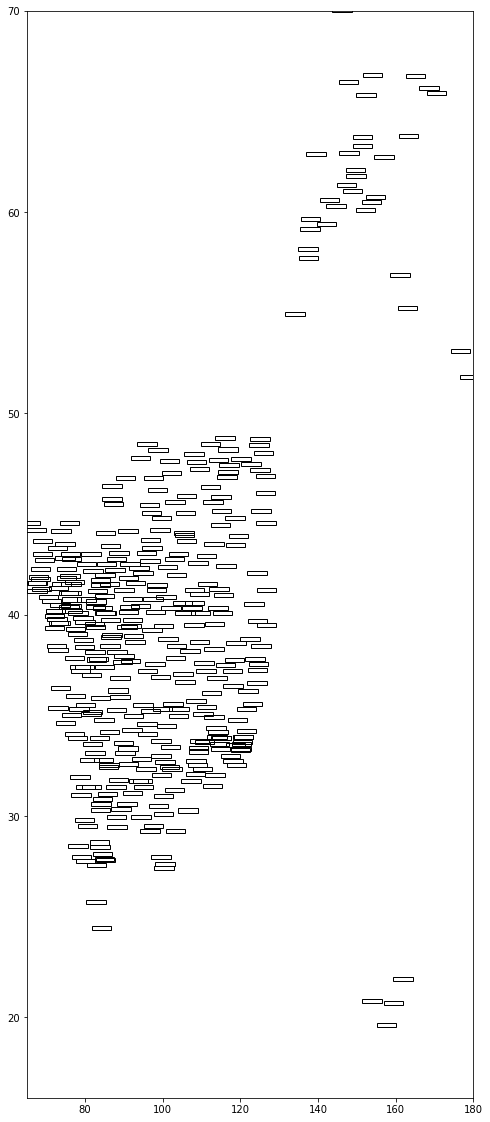

In [116]:
prepare_data(3)
test1_name1 = "200_200_386_random"
test1_name2 = "200_200_386_result"
result_record, result_layout, layout = sasearch(origin_times=1,init_temperature=200, min_temperature=1e-3, cooling_rate=0.90, iterates=200, namefortest=test1_name1)
# plt.plot(result_record)
# plt.show()
cc = cost_function(layout)
print(cc)
nameprefix = str(test1_name2) + str(cc)
plot(layout=layout,name=nameprefix)

initial state:
860.9000000000001


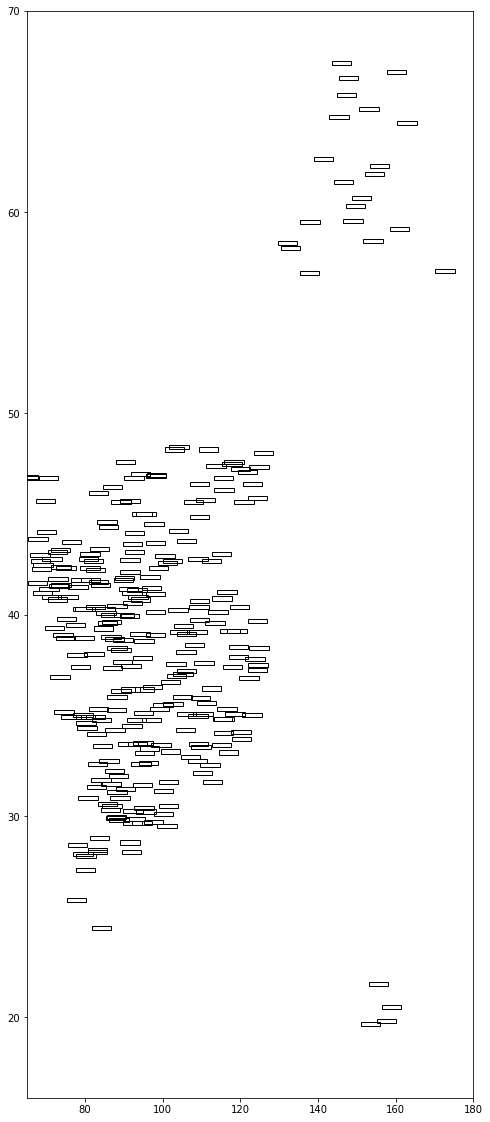

180.0
162.0
145.8
131.22000000000003
118.09800000000003
106.28820000000003
95.65938000000003
86.09344200000002
77.48409780000003
69.73568802000003
62.762119218000024
56.485907296200025
50.83731656658002
45.75358490992202
41.17822641892982
37.06040377703684
33.35436339933316
30.018927059399843
27.01703435345986
24.315330918113872
21.883797826302487
19.695418043672237
17.725876239305013
15.953288615374511
14.35795975383706
12.922163778453355
11.62994740060802
10.466952660547218
9.420257394492497
8.478231655043247
7.630408489538922
6.86736764058503
6.180630876526528
5.562567788873875
5.006311009986487
4.5056799089878385
4.055111918089055
3.6496007262801493
3.2846406536521346
2.956176588286921
2.660558929458229
2.3945030365124063
2.1550527328611655
1.939547459575049
1.7455927136175442
1.57103344225579
1.413930098030211
1.2725370882271898
1.1452833794044708
1.0307550414640236
0.9276795373176213
0.8349115835858592
0.7514204252272733
0.676278382704546
0.6086505444340914
0.5477854899906822
0.4

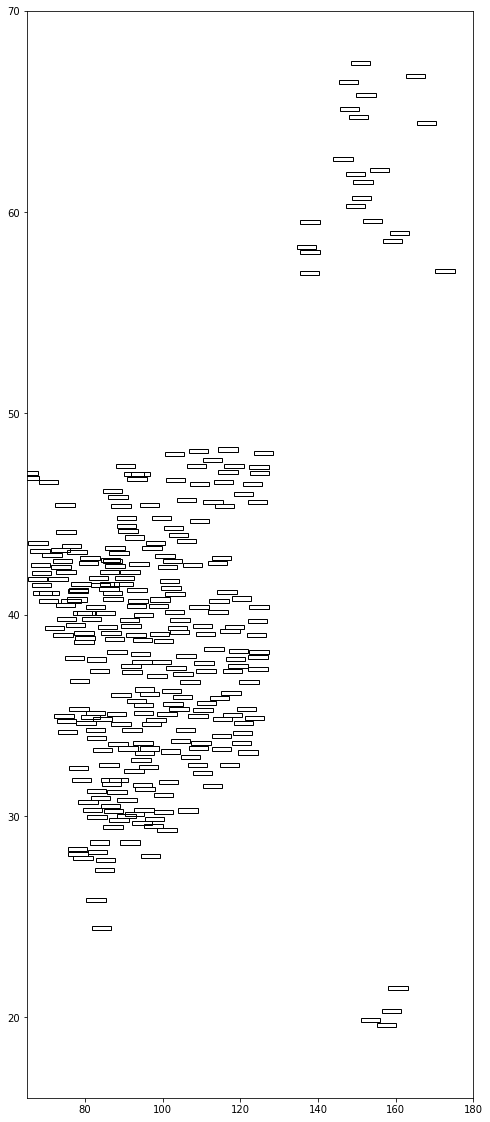

In [117]:
prepare_data(4)
test1_name1 = "200_500_289_random"
test1_name2 = "200_500_289_result"
result_record, result_layout, layout = sasearch(origin_times=1,init_temperature=200, min_temperature=1e-3, cooling_rate=0.90, iterates=500, namefortest=test1_name1)
# plt.plot(result_record)
# plt.show()
cc = cost_function(layout)
print(cc)
nameprefix = str(test1_name2) + str(cc)
plot(layout=layout,name=nameprefix)

initial state:
914.1000000000001


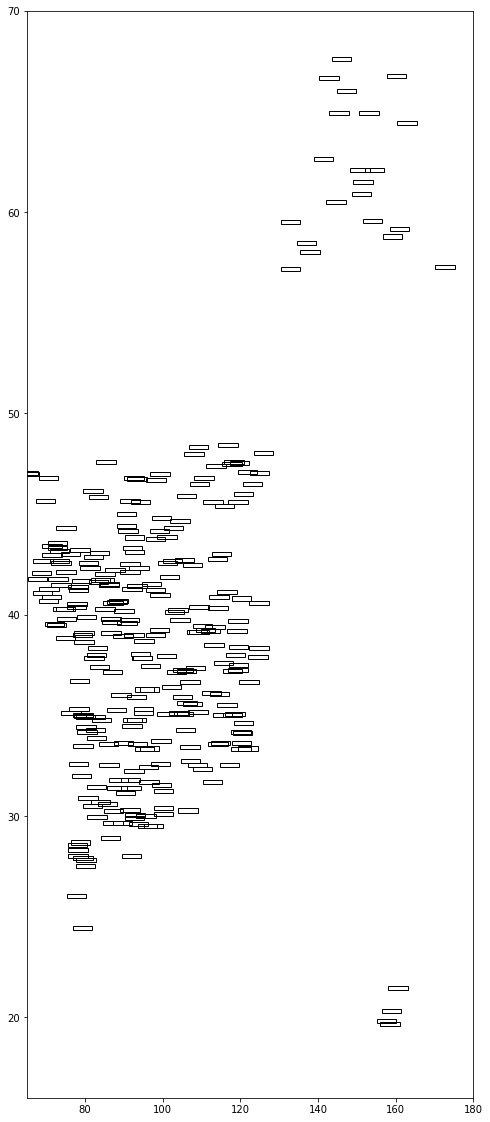

180.0
162.0
145.8
131.22000000000003
118.09800000000003
106.28820000000003
95.65938000000003
86.09344200000002
77.48409780000003
69.73568802000003
62.762119218000024
56.485907296200025
50.83731656658002
45.75358490992202
41.17822641892982
37.06040377703684
33.35436339933316
30.018927059399843
27.01703435345986
24.315330918113872
21.883797826302487
19.695418043672237
17.725876239305013
15.953288615374511
14.35795975383706
12.922163778453355
11.62994740060802
10.466952660547218
9.420257394492497
8.478231655043247
7.630408489538922
6.86736764058503
6.180630876526528
5.562567788873875
5.006311009986487
4.5056799089878385
4.055111918089055
3.6496007262801493
3.2846406536521346
2.956176588286921
2.660558929458229
2.3945030365124063
2.1550527328611655
1.939547459575049
1.7455927136175442
1.57103344225579
1.413930098030211
1.2725370882271898
1.1452833794044708
1.0307550414640236
0.9276795373176213
0.8349115835858592
0.7514204252272733
0.676278382704546
0.6086505444340914
0.5477854899906822
0.4

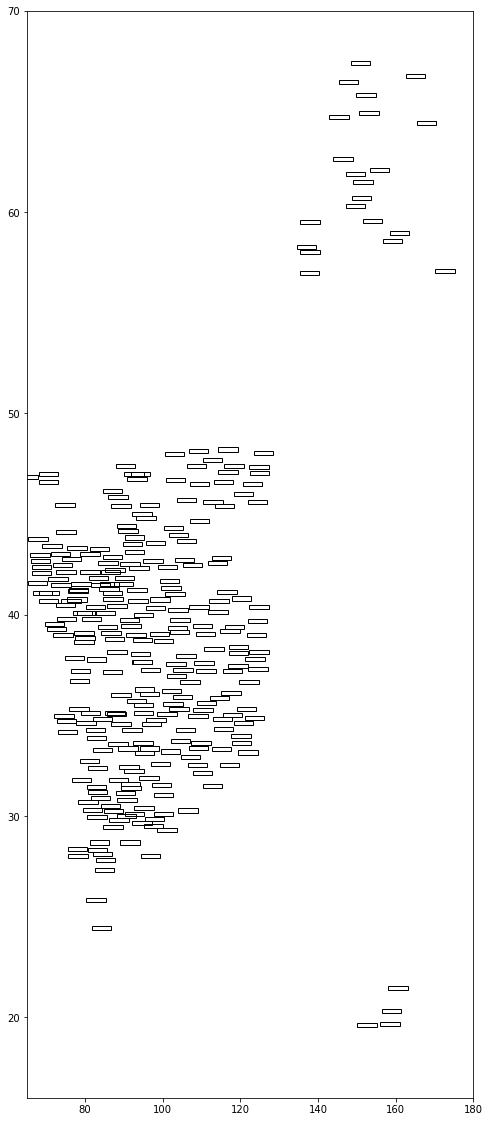

In [118]:
prepare_data(4)
test1_name1 = "200_500_289_random"
test1_name2 = "200_500_289_result"
result_record, result_layout, layout = sasearch(origin_times=1,init_temperature=200, min_temperature=1e-3, cooling_rate=0.90, iterates=500, namefortest=test1_name1)
# plt.plot(result_record)
# plt.show()
cc = cost_function(layout)
print(cc)
nameprefix = str(test1_name2) + str(cc)
plot(layout=layout,name=nameprefix)

initial state:
1699.1000000000001


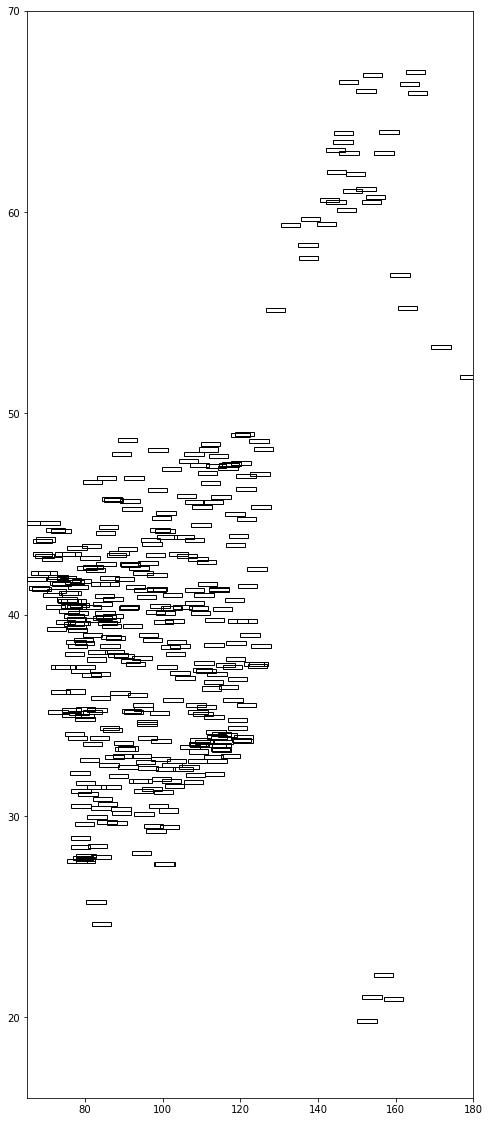

180.0
162.0
145.8
131.22000000000003
118.09800000000003
106.28820000000003
95.65938000000003
86.09344200000002
77.48409780000003
69.73568802000003
62.762119218000024
56.485907296200025
50.83731656658002
45.75358490992202
41.17822641892982
37.06040377703684
33.35436339933316
30.018927059399843
27.01703435345986
24.315330918113872
21.883797826302487
19.695418043672237
17.725876239305013
15.953288615374511
14.35795975383706
12.922163778453355
11.62994740060802
10.466952660547218
9.420257394492497
8.478231655043247
7.630408489538922
6.86736764058503
6.180630876526528
5.562567788873875
5.006311009986487
4.5056799089878385
4.055111918089055
3.6496007262801493
3.2846406536521346
2.956176588286921
2.660558929458229
2.3945030365124063
2.1550527328611655
1.939547459575049
1.7455927136175442
1.57103344225579
1.413930098030211
1.2725370882271898
1.1452833794044708
1.0307550414640236
0.9276795373176213
0.8349115835858592
0.7514204252272733
0.676278382704546
0.6086505444340914
0.5477854899906822
0.4

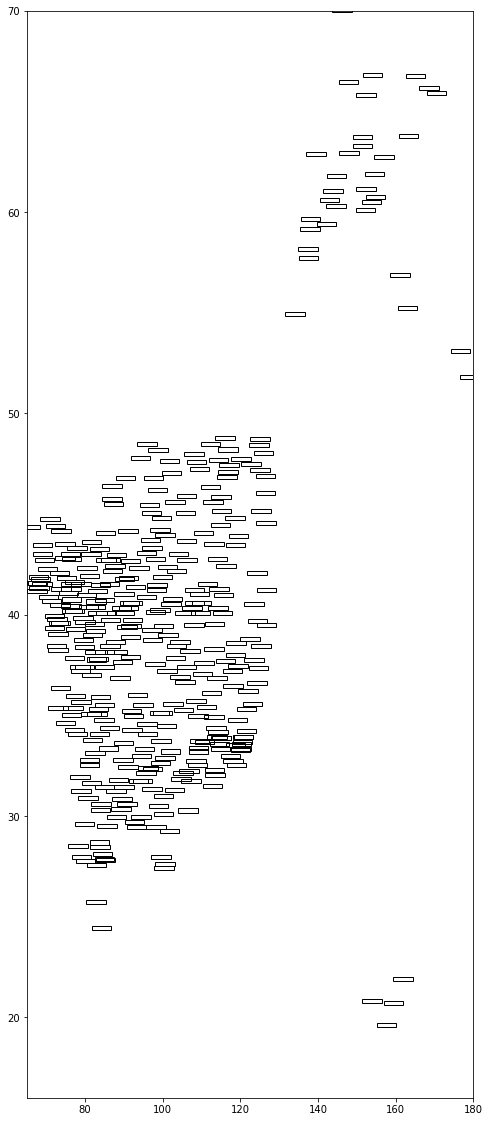

In [119]:
prepare_data(3)
test1_name1 = "200_500_386_random"
test1_name2 = "200_500_386_result"
result_record, result_layout, layout = sasearch(origin_times=1,init_temperature=200, min_temperature=1e-3, cooling_rate=0.90, iterates=500, namefortest=test1_name1)
# plt.plot(result_record)
# plt.show()
cc = cost_function(layout)
print(cc)
nameprefix = str(test1_name2) + str(cc)
plot(layout=layout,name=nameprefix)

initial state:
3695.5


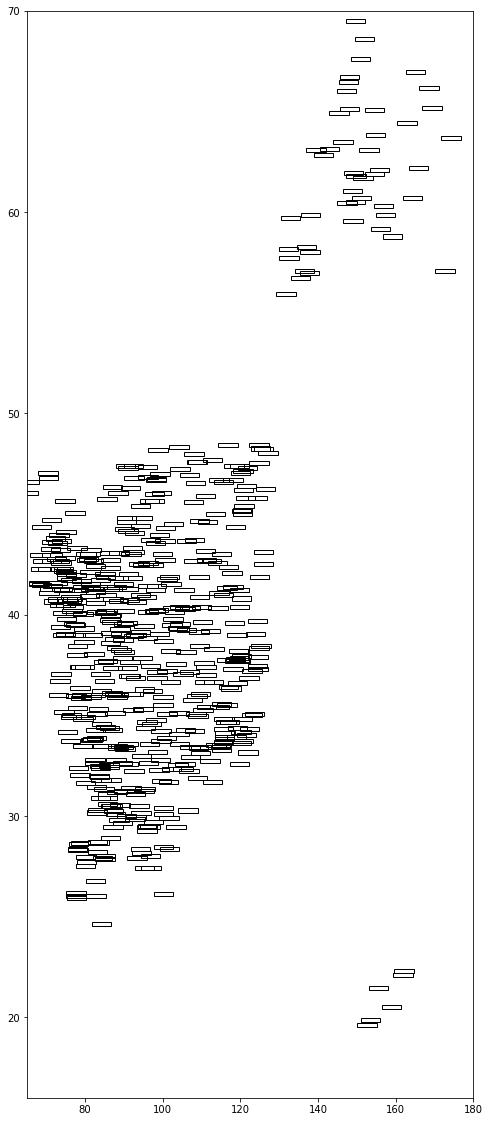

180.0
162.0
145.8
131.22000000000003
118.09800000000003
106.28820000000003
95.65938000000003
86.09344200000002
77.48409780000003
69.73568802000003
62.762119218000024
56.485907296200025
50.83731656658002
45.75358490992202
41.17822641892982
37.06040377703684
33.35436339933316
30.018927059399843
27.01703435345986
24.315330918113872
21.883797826302487
19.695418043672237
17.725876239305013
15.953288615374511
14.35795975383706
12.922163778453355
11.62994740060802
10.466952660547218
9.420257394492497
8.478231655043247
7.630408489538922
6.86736764058503
6.180630876526528
5.562567788873875
5.006311009986487
4.5056799089878385
4.055111918089055
3.6496007262801493
3.2846406536521346
2.956176588286921
2.660558929458229
2.3945030365124063
2.1550527328611655
1.939547459575049
1.7455927136175442
1.57103344225579
1.413930098030211
1.2725370882271898
1.1452833794044708
1.0307550414640236
0.9276795373176213
0.8349115835858592
0.7514204252272733
0.676278382704546
0.6086505444340914
0.5477854899906822
0.4

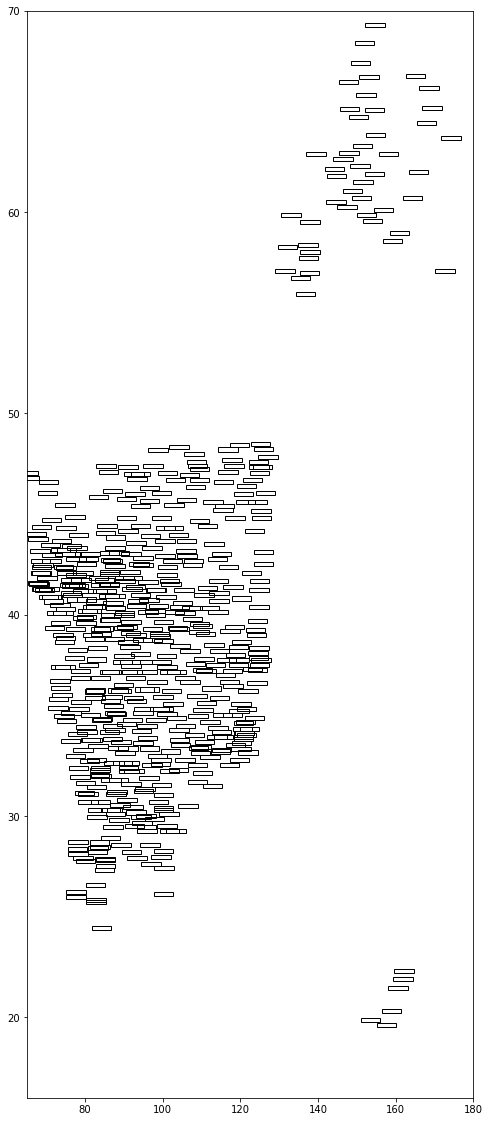

In [120]:
prepare_data(2)
test1_name1 = "200_500_579_random"
test1_name2 = "200_500_579_result"
result_record, result_layout, layout = sasearch(origin_times=1,init_temperature=200, min_temperature=1e-3, cooling_rate=0.90, iterates=500, namefortest=test1_name1)
# plt.plot(result_record)
# plt.show()
cc = cost_function(layout)
print(cc)
nameprefix = str(test1_name2) + str(cc)
plot(layout=layout,name=nameprefix)

initial state:
3432.7999999999997


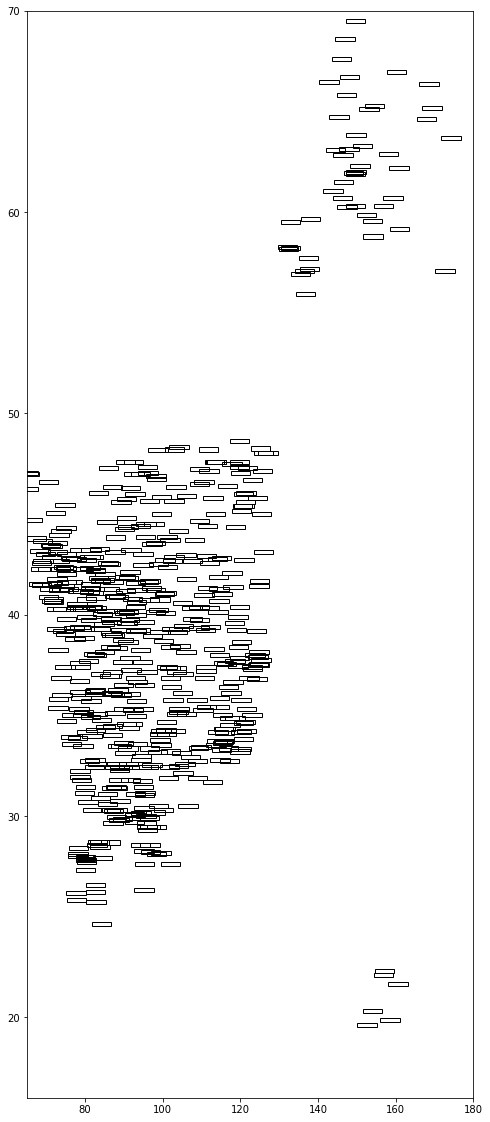

180.0
162.0
145.8
131.22000000000003
118.09800000000003
106.28820000000003
95.65938000000003
86.09344200000002
77.48409780000003
69.73568802000003
62.762119218000024
56.485907296200025
50.83731656658002
45.75358490992202
41.17822641892982
37.06040377703684
33.35436339933316
30.018927059399843
27.01703435345986
24.315330918113872
21.883797826302487
19.695418043672237
17.725876239305013
15.953288615374511
14.35795975383706
12.922163778453355
11.62994740060802
10.466952660547218
9.420257394492497
8.478231655043247
7.630408489538922
6.86736764058503
6.180630876526528
5.562567788873875
5.006311009986487
4.5056799089878385
4.055111918089055
3.6496007262801493
3.2846406536521346
2.956176588286921
2.660558929458229
2.3945030365124063
2.1550527328611655
1.939547459575049
1.7455927136175442
1.57103344225579
1.413930098030211
1.2725370882271898
1.1452833794044708
1.0307550414640236
0.9276795373176213
0.8349115835858592
0.7514204252272733
0.676278382704546
0.6086505444340914
0.5477854899906822
0.4

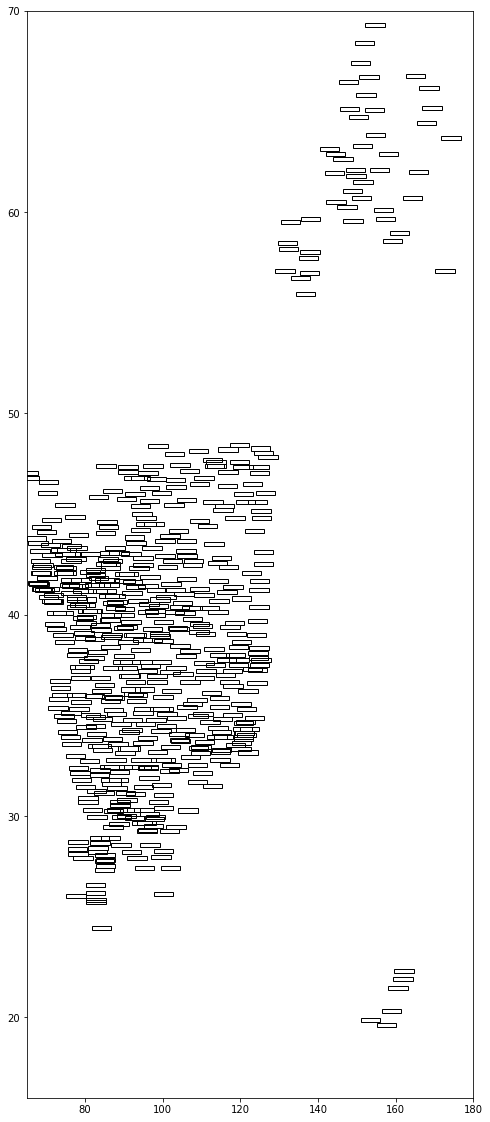

In [121]:
prepare_data(2)
test1_name1 = "200_200_579_random"
test1_name2 = "200_200_579_result"
result_record, result_layout, layout = sasearch(origin_times=1,init_temperature=200, min_temperature=1e-3, cooling_rate=0.90, iterates=200, namefortest=test1_name1)
# plt.plot(result_record)
# plt.show()
cc = cost_function(layout)
print(cc)
nameprefix = str(test1_name2) + str(cc)
plot(layout=layout,name=nameprefix)

initial state:
569.6


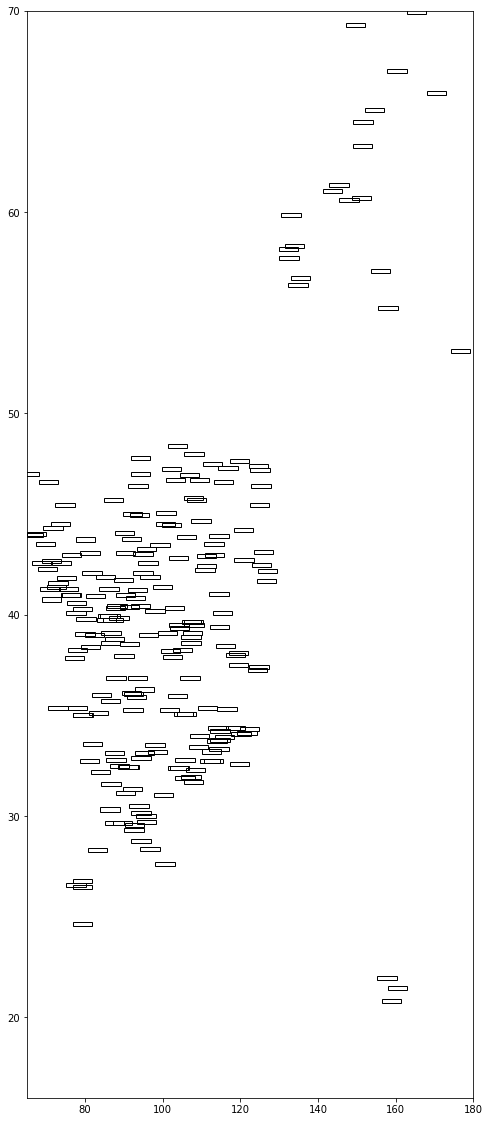

180.0
162.0
145.8
131.22000000000003
118.09800000000003
106.28820000000003
95.65938000000003
86.09344200000002
77.48409780000003
69.73568802000003
62.762119218000024
56.485907296200025
50.83731656658002
45.75358490992202
41.17822641892982
37.06040377703684
33.35436339933316
30.018927059399843
27.01703435345986
24.315330918113872
21.883797826302487
19.695418043672237
17.725876239305013
15.953288615374511
14.35795975383706
12.922163778453355
11.62994740060802
10.466952660547218
9.420257394492497
8.478231655043247
7.630408489538922
6.86736764058503
6.180630876526528
5.562567788873875
5.006311009986487
4.5056799089878385
4.055111918089055
3.6496007262801493
3.2846406536521346
2.956176588286921
2.660558929458229
2.3945030365124063
2.1550527328611655
1.939547459575049
1.7455927136175442
1.57103344225579
1.413930098030211
1.2725370882271898
1.1452833794044708
1.0307550414640236
0.9276795373176213
0.8349115835858592
0.7514204252272733
0.676278382704546
0.6086505444340914
0.5477854899906822
0.4

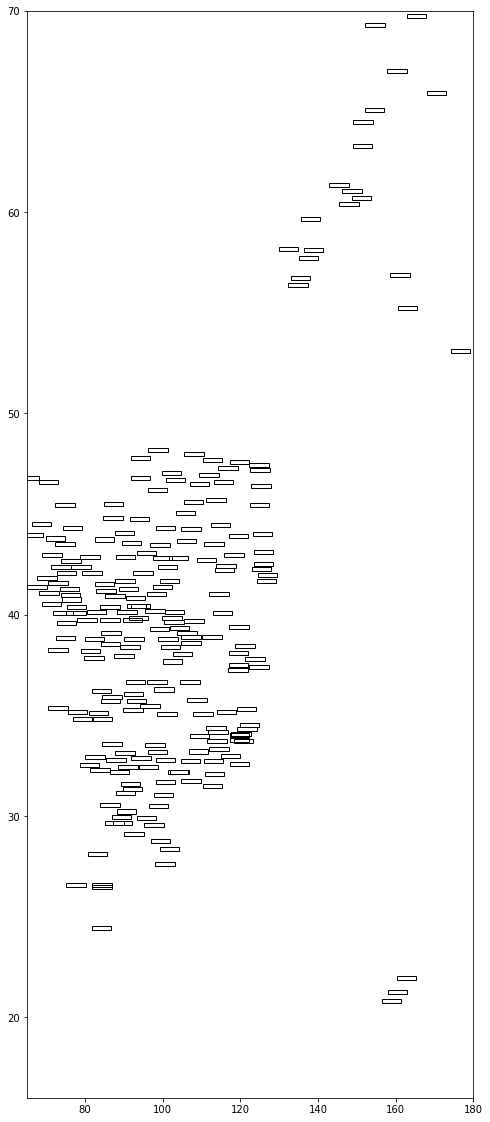

In [122]:
prepare_data(5)
test1_name1 = "200_200_231_random"
test1_name2 = "200_200_231_result"
result_record, result_layout, layout = sasearch(origin_times=1,init_temperature=200, min_temperature=1e-3, cooling_rate=0.90, iterates=200, namefortest=test1_name1)
# plt.plot(result_record)
# plt.show()
cc = cost_function(layout)
print(cc)
nameprefix = str(test1_name2) + str(cc)
plot(layout=layout,name=nameprefix)

initial state:
627.5


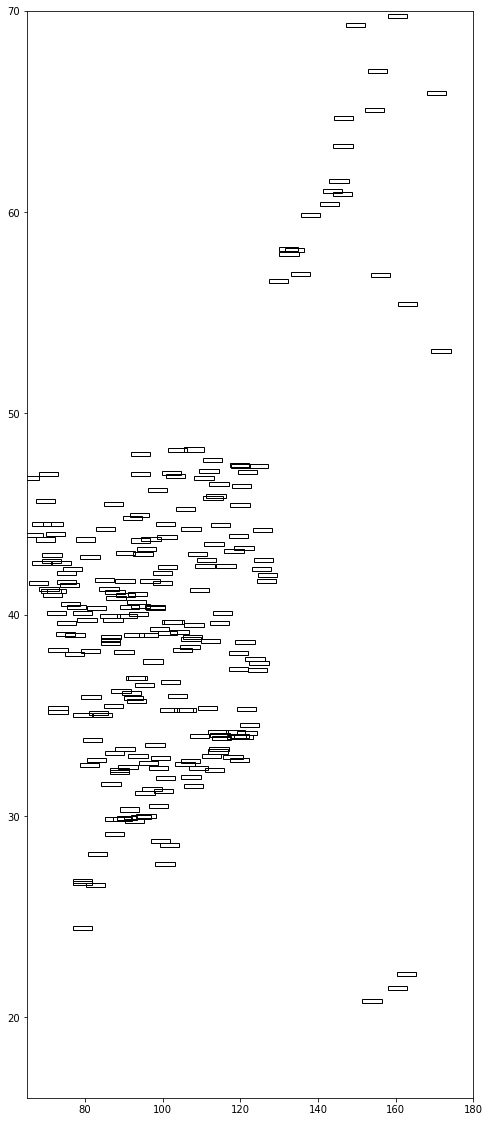

180.0
162.0
145.8
131.22000000000003
118.09800000000003
106.28820000000003
95.65938000000003
86.09344200000002
77.48409780000003
69.73568802000003
62.762119218000024
56.485907296200025
50.83731656658002
45.75358490992202
41.17822641892982
37.06040377703684
33.35436339933316
30.018927059399843
27.01703435345986
24.315330918113872
21.883797826302487
19.695418043672237
17.725876239305013
15.953288615374511
14.35795975383706
12.922163778453355
11.62994740060802
10.466952660547218
9.420257394492497
8.478231655043247
7.630408489538922
6.86736764058503
6.180630876526528
5.562567788873875
5.006311009986487
4.5056799089878385
4.055111918089055
3.6496007262801493
3.2846406536521346
2.956176588286921
2.660558929458229
2.3945030365124063
2.1550527328611655
1.939547459575049
1.7455927136175442
1.57103344225579
1.413930098030211
1.2725370882271898
1.1452833794044708
1.0307550414640236
0.9276795373176213
0.8349115835858592
0.7514204252272733
0.676278382704546
0.6086505444340914
0.5477854899906822
0.4

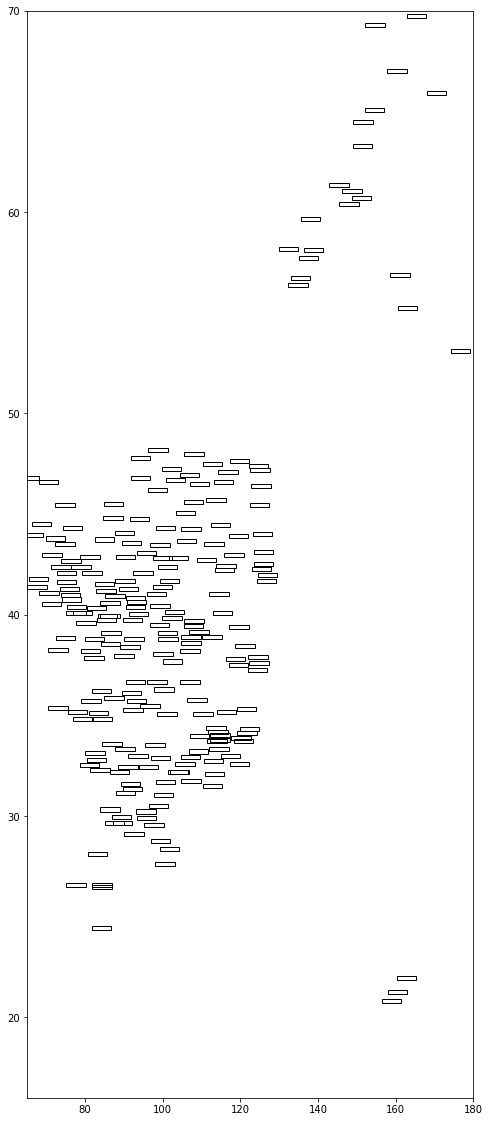

In [123]:
prepare_data(5)
test1_name1 = "200_500_231_random"
test1_name2 = "200_500_231_result"
result_record, result_layout, layout = sasearch(origin_times=1,init_temperature=200, min_temperature=1e-3, cooling_rate=0.90, iterates=500, namefortest=test1_name1)
# plt.plot(result_record)
# plt.show()
cc = cost_function(layout)
print(cc)
nameprefix = str(test1_name2) + str(cc)
plot(layout=layout,name=nameprefix)